<a href="https://colab.research.google.com/github/caiociardelli/earth323/blob/main/3_Hidden_Interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hidden Interface

Author: Caio Ciardelli
<br>
Northwestern University, October 6, 2022
<br>

###Direct wave

\begin{equation}
t_1\,=\,\frac{x}{V_1}
\end{equation}

###N-th head wave

\begin{equation}
t_n\,=\,\frac{x}{V_n}
   \,+\,\sum_{m\,=\,1}^n\frac{2h_m\sqrt{{V_n}^2\,-\,{V_m}^2}}{V_mV_n}
\qquad n\,\ge\,2\quad\text{and}\quad m\,<\,n
\end{equation}

####Critical distance

\begin{equation}
x_{c_n}
\,=\,\sum_{m\,=\,1}^n 2h_m\tan{i_{mn}}
\end{equation}
<br>
\begin{equation}
\Downarrow
\end{equation}
<br>
\begin{equation}
x_{c_n}
\,=\,\sum_{m\,=\,1}^n \frac{2h_mV_m}{\sqrt{{V_n}^2\,-\,{V_m}^2}}
\end{equation}

In [ ]:
import math
import numpy as np

In [ ]:
def directWave (x, v1):

  return x / v1

def criticalDistance (h, v, n):

  xc = 0

  for m in range (n):

    xc += 2 * h[m] * v[m] / math.sqrt (v[-1] ** 2 - v[m] ** 2)

  return xc

def headWave (x, h, v, n):

  h_sum = 0 

  for m in range (n):

    h_sum += 2 * h[m] * math.sqrt (v[-1] ** 2 - v[m] ** 2) \
             / (v[m] * v[-1])

  return x / v[n] + h_sum

In [ ]:
if __name__ == '__main__':

# Modify the parameters and re-execute the code to see
# how the travel-time curves change

  xmin = 0   # (km)
  xmax = 110 # (km)
  h = [7.0, 3.0, 15.0]       # (km)
  v = [1.0, 2.0,  4.0,  8.0] # (km/s)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def createModelPlot (h, v):

  d = [0]

  for m in range (len (h)):

    d += [h[m] + d[m]]

  x = [value for pair in zip (v, v) for value in pair]
  y = [value for pair in zip (d, d[1:]) for value in pair]

  y += [d[-1]] + [1.2 * d[-1]]

  return x, y

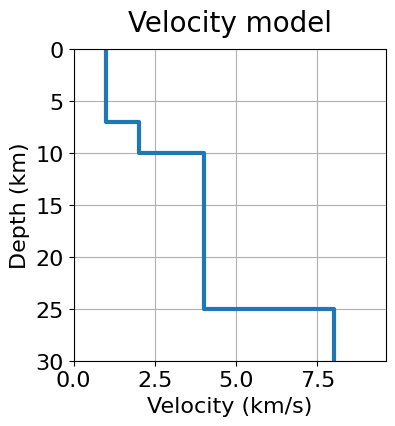

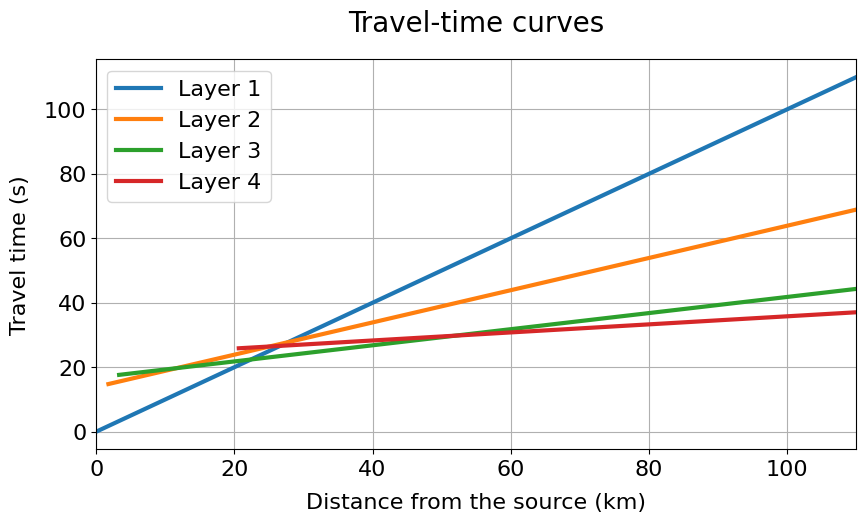

In [ ]:
 if __name__ == '__main__':

  x, y = createModelPlot (h, v)

  plt.figure (1, figsize = (4, 4), dpi = 100)

  plt.plot (x, y, linewidth = 3)
  plt.xlim (0, 1.2 * max (x))
  plt.ylim (max (y), 0)
  plt.xlabel ('Velocity (km/s)', fontsize = 16)
  plt.ylabel ('Depth (km)', fontsize = 16)
  plt.tick_params (axis = 'x', labelsize = 16)
  plt.tick_params (axis = 'y', labelsize = 16)
  plt.grid ()
  plt.title ('Velocity model', fontsize = 20, y = 1.03)

  plt.subplots_adjust (left = 0.12, bottom = 0.12,
                       top = 0.9, right = 0.9)

  plt.figure (2, figsize = (10, 5), dpi = 100)

  x1 = np.linspace (xmin, xmax)
  t1 = directWave (x1, v[0])

  plt.plot (x1, t1,
            linewidth = 3,
            label = 'Layer 1')

  for n in range (1, len (v)):

    xc = criticalDistance (h, v, n)

    x = np.linspace (xc, xmax)
    t = headWave (x, h, v, n)

    plt.plot (x, t, linewidth = 3,
              label = 'Layer {}'.format (n + 1))

  plt.xlim (0, x[-1])
  plt.xlabel ('Distance from the source (km)',
              fontsize = 16,
              labelpad = 10)
  plt.ylabel ('Travel time (s)',
              fontsize = 16,
              labelpad = 10)
  plt.tick_params (axis = 'x', labelsize = 16)
  plt.tick_params (axis = 'y', labelsize = 16)
  plt.legend (loc = 2, fontsize = 16)
  plt.grid ()

  plt.title ('Travel-time curves',
             fontsize = 20,
             y = 1.05)
  plt.subplots_adjust (left = 0.14, bottom = 0.12,
                       top = 0.9, right = 0.9)
  plt.show ()